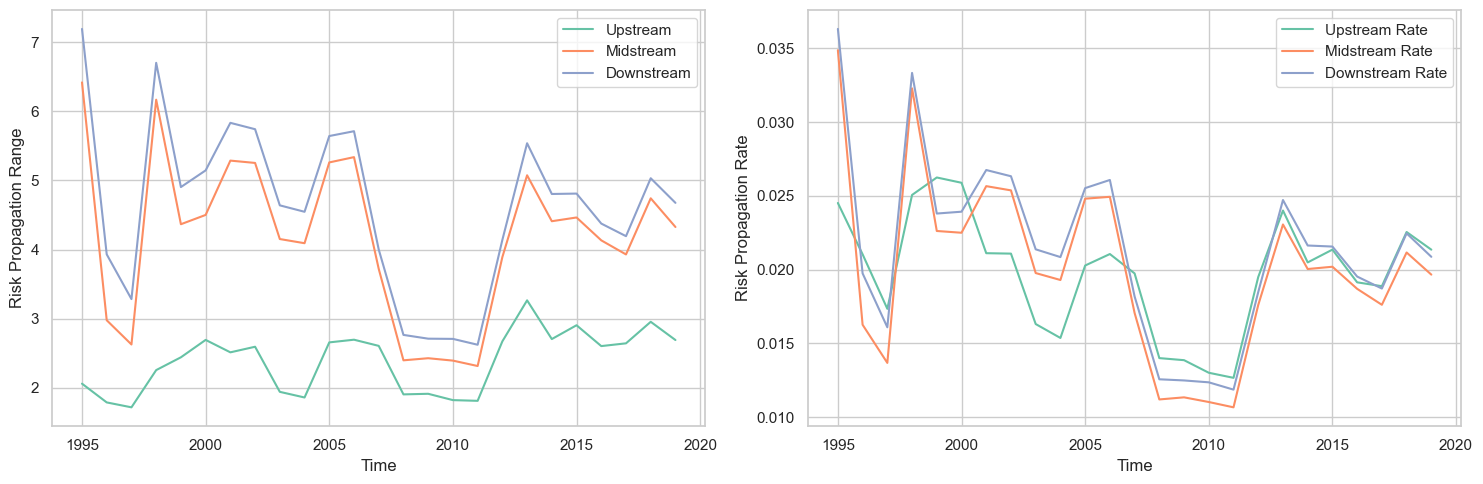

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
file_path = "Average Risk Propagation Rate.csv"
data = pd.read_csv(file_path)

# Set the style of the visualization
sns.set(style="whitegrid")

# Set the color palette
sns.set_palette("Set2")

# Create a figure and a set of subplots in one row
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot the avalanche country data
axs[0].plot(data['time'], data['upstream_country'], label='Upstream')
axs[0].plot(data['time'], data['midstream_country'], label='Midstream')
axs[0].plot(data['time'], data['downstream_country'], label='Downstream')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Risk Propagation Range')
axs[0].legend()

# Plot the avalanche rate data
axs[1].plot(data['time'], data['upstream_rate'], label='Upstream Rate')
axs[1].plot(data['time'], data['midstream_rate'], label='Midstream Rate')
axs[1].plot(data['time'], data['downstream_rate'], label='Downstream Rate')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Risk Propagation Rate')
axs[1].legend()

# Remove titles from subplots
axs[0].set_title('')
axs[1].set_title('')

# Adjust layout
plt.tight_layout()

# Save the combined image
plt.savefig("results/figure 7.png", dpi=300)

# Show the combined image
plt.show()


C:\Users\86191\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\86191\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\86191\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\86191\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

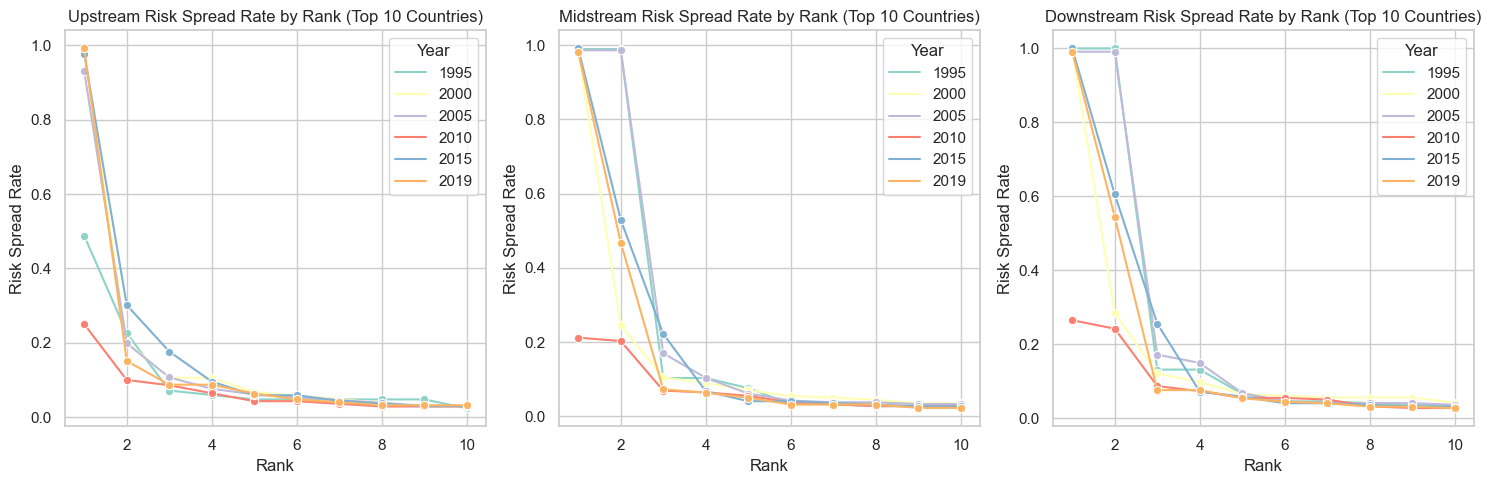

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "Top Thirty Countries with Maximum Risk Propagation Range.xlsx"
xls = pd.ExcelFile(file_path)

# Load the data from the Excel sheets
upstream_data = xls.parse('Upstream Max 30')
midstream_data = xls.parse('Midstream Max 30')
downstream_data = xls.parse('Downstream Max 30')

# Add ranking column to the dataframes
upstream_data['Rank'] = range(1, 31)
midstream_data['Rank'] = range(1, 31)
downstream_data['Rank'] = range(1, 31)

# Select data for the specific years
years_for_plot = ['1995', '2000', '2005', '2010', '2015', '2019']

# Select the top 10 countries
top_10_upstream = upstream_data.head(10)
top_10_midstream = midstream_data.head(10)
top_10_downstream = downstream_data.head(10)

# Melt the dataframes to long format for easier plotting
upstream_long = pd.melt(top_10_upstream, id_vars='Rank', value_vars=years_for_plot, var_name='Year', value_name='Risk Spread Rate')
midstream_long = pd.melt(top_10_midstream, id_vars='Rank', value_vars=years_for_plot, var_name='Year', value_name='Risk Spread Rate')
downstream_long = pd.melt(top_10_downstream, id_vars='Rank', value_vars=years_for_plot, var_name='Year', value_name='Risk Spread Rate')

# Create a figure and a set of subplots in one row
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot the line plots
sns.set_palette("Set2")

sns.lineplot(x='Rank', y='Risk Spread Rate', hue='Year', data=upstream_long, ax=axs[0], palette='Set3', marker='o', legend='auto')
axs[0].set_title('Upstream Risk Spread Rate by Rank (Top 10 Countries)')

sns.lineplot(x='Rank', y='Risk Spread Rate', hue='Year', data=midstream_long, ax=axs[1], palette='Set3', marker='o', legend='auto')
axs[1].set_title('Midstream Risk Spread Rate by Rank (Top 10 Countries)')

sns.lineplot(x='Rank', y='Risk Spread Rate', hue='Year', data=downstream_long, ax=axs[2], palette='Set3', marker='o', legend='auto')
axs[2].set_title('Downstream Risk Spread Rate by Rank (Top 10 Countries)')

# Adjust layout
plt.tight_layout()

# Manually adjust and display the legend
for ax in axs:
    ax.legend(loc='upper right', title='Year')

# Save the combined image
plt.savefig("results/figure 8.png", dpi=300)

# Show the combined image
plt.show()


C:\Users\86191\AppData\Local\Temp\ipykernel_11368\3386810188.py:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


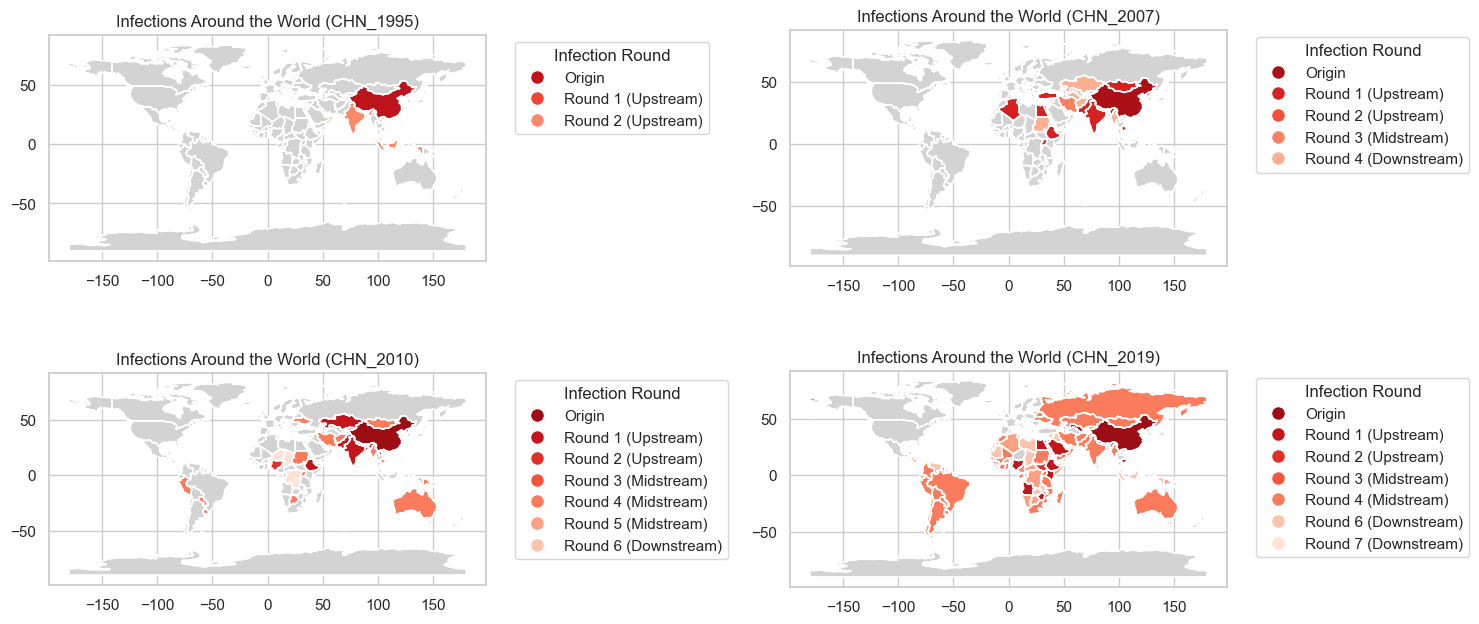

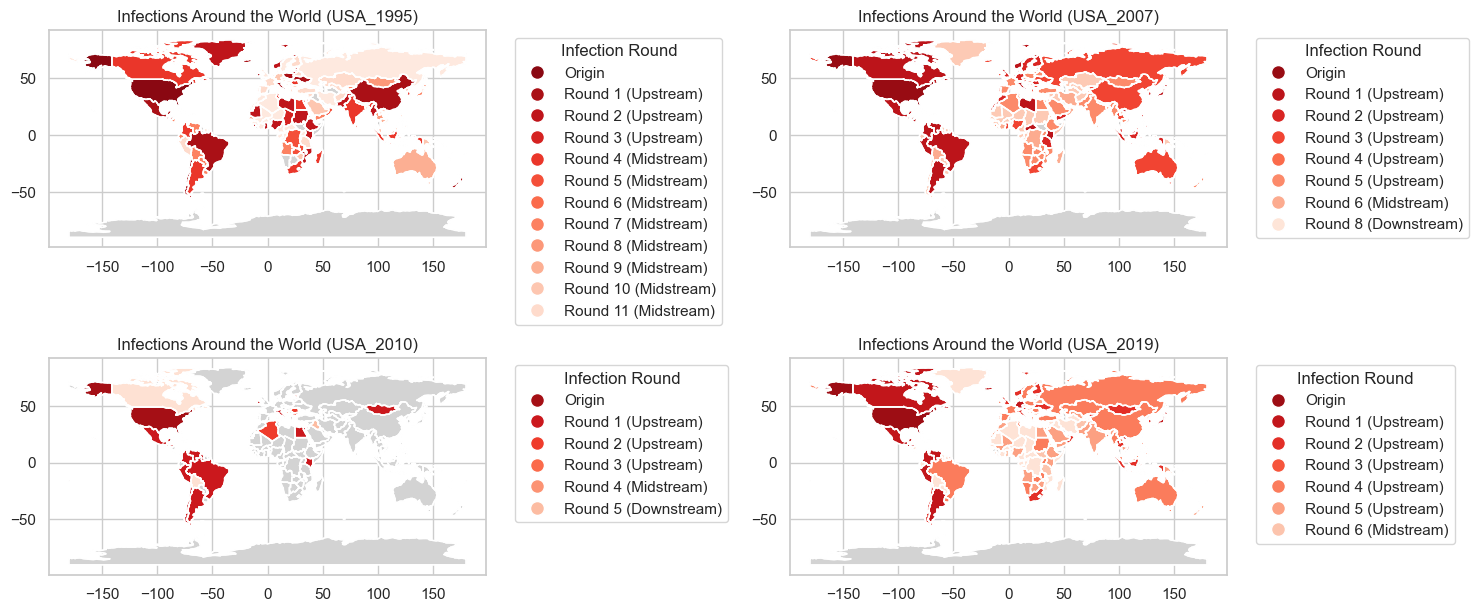

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.colors import ListedColormap

# 读取 Excel 文件
excel_path =  "Risk Propagation Pathways of China and the United States.xlsx"
xls = pd.ExcelFile(excel_path)

# 读取世界地图数据
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 创建国家代码到国家名的映射
country_code_to_name = pd.Series(world.name.values, index=world.iso_a3).to_dict()

# 定义一个函数来提取轮次中的数字
def extract_round_number(s):
    if "Origin" in s:
        return -1  # 确保 Origin 总是排在最前面
    numbers = re.findall(r'\d+', s)
    if not numbers:
        return 0  # 如果没有数字，返回 0
    return int(numbers[0])  # 返回第一个数字

# 定义绘制地图的函数
def plot_map(sheet_name, ax):
    # 读取数据
    data = pd.read_excel(excel_path, sheet_name=sheet_name)
    
    # 设置地图样式
    world["infections"] = 0  # 重置感染次数
    world["round"] = ""  # 添加一个新列用于存储轮次信息
    
    # 更新感染数据
    round_descriptions = {}
    for col_num, col in enumerate(data.columns, start=0):
        round_num = f"Round {col_num}"
        round_description = ""
        if "upstream" in col.lower():
            round_description = "Upstream"
        elif "midstream" in col.lower():
            round_description = "Midstream"
        elif "downstream" in col.lower():
            round_description = "Downstream"

        if round_description:
            round_descriptions[col] = f"{round_num} ({round_description})"
        else:
            round_descriptions[col] = round_num
            
        countries = data[col].dropna().unique()
        for country in countries:
            country_name = country_code_to_name.get(country, country)
            world.loc[world["name"] == country_name, "infections"] = 1
            world.loc[world["name"] == country_name, "round"] = round_descriptions[col]

    # 确保初始国家被标记为感染国
    initial_country = sheet_name.split("_")[0]
    initial_country_name = country_code_to_name.get(initial_country, initial_country)
    world.loc[world["name"] == initial_country_name, "infections"] = 1
    world.loc[world["name"] == initial_country_name, "round"] = "Origin"
    
    # 对轮次进行排序
    world["round_number"] = world["round"].apply(extract_round_number)
    world.sort_values("round_number", inplace=True)
    
    # 创建一个离散型的颜色映射
    n_colors = len(world["round"].unique())
    cmap = ListedColormap(sns.color_palette("Reds_r", n_colors=n_colors))  # 使用 "_r" 获取反转的颜色映射
    
    # 绘制地图
    world.boundary.plot(ax=ax, linewidth=1, color="white")
    world.plot(color="lightgrey", ax=ax)
    patches = world[world["infections"] == 1].plot(column='round', ax=ax, cmap=cmap)
    
    # 手动创建图例
    legend_labels = sorted(world[world["infections"] == 1]["round"].unique(), key=extract_round_number)  # 不反转排序
    legend_colors = [cmap(extract_round_number(label) / n_colors) for label in legend_labels]
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_colors]
    ax.legend(legend_handles, legend_labels, title="Infection Round", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    ax.set_title(f'Infections Around the World ({sheet_name})')

# 为同一个国家的不同时间点创建2x2的图表
for country in ["CHN", "USA"]:
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    axs = axs.flatten()
    for i, year in enumerate(["1995", "2007", "2010", "2019"]):
        sheet_name = f"{country}_{year}"
        plot_map(sheet_name, axs[i])
    plt.subplots_adjust(hspace=-0.8)  # 调整子图间的垂直间距
    plt.tight_layout()
    save_path = f"results/{country}_infections.png"
    plt.savefig(save_path, dpi=300)  # 保存图片到指定路径
    plt.show()

Average Values:
year          2007.000000
upstream         0.576256
midstream        0.668732
downstream       0.682271
all              0.668678
dtype: float64


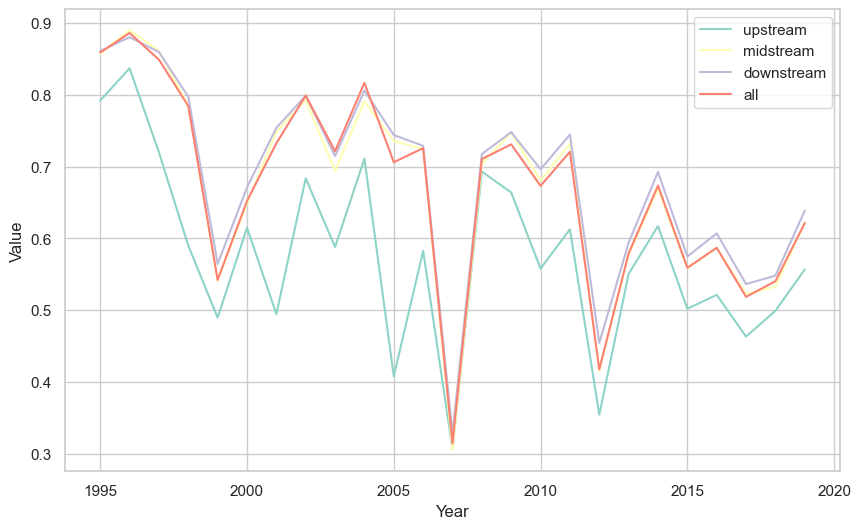

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from a CSV file
file_path = "Relationship Between Degree and Risk Transmission Range.csv.csv"
data = pd.read_csv(file_path)

# Calculate the average values for each column
average_values = data.mean()

# Set the visualization style
sns.set(style="whitegrid")

# Set the color palette to "Set3"
palette = sns.color_palette("Set3", 4)

# Create a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Plot each line
for i, column in enumerate(["upstream", "midstream", "downstream", "all"]):
    plt.plot(data["year"], data[column], label=column, color=palette[i])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')

plt.legend()

# Print the average values
print("Average Values:")
print(average_values)

# Save the chart
plt.savefig("results/figure 11.png", dpi=300)

# Show the chart
plt.show()


In [8]:
import pandas as pd
import numpy as np

# Load the data

file_path_nodelist = "wb_nodelist.xlsx"
years_of_interest = [1995, 2000, 2005, 2010, 2015, 2019]
nodelist_data = {year: pd.read_excel(file_path_nodelist, sheet_name=f'nodelist_{year}') for year in years_of_interest}

# Extract the top ten countries and their degrees for each year
top_10_degrees_by_year = {}
for year in years_of_interest:
    top_10_degrees_by_year[year] = nodelist_data[year].nlargest(10, 'degree')[['label', 'degree']]

# Organize the data for each year into one dataframe
top_10_degrees_df = pd.DataFrame()
for year, data in top_10_degrees_by_year.items():
    data = data.reset_index(drop=True)
    top_10_degrees_df[f'{year}_Country'] = data['label']
    top_10_degrees_df[f'{year}_Degree'] = data['degree']

# Calculate Coreness values
def calculate_coreness(data, country_column, value_column):
    sorted_data = data.sort_values(by=value_column, ascending=False)
    top_10_countries = sorted_data.head(10)
    top_10_countries['coreness'] = range(10, 0, -1)
    return top_10_countries[[country_column, 'coreness']]

# Calculate Coreness values for each selected year
coreness_nodelist = {}
for year in years_of_interest:
    coreness_nodelist[year] = calculate_coreness(nodelist_data[year], 'label', 'degree')

# Create a dataframe containing the top ten countries and their degrees and Coreness values for each selected year
nodelist_results = []
for year in years_of_interest:
    temp_df = coreness_nodelist[year].copy()
    temp_df['year'] = year
    temp_df['degree'] = nodelist_data[year].loc[temp_df.index, 'degree']
    nodelist_results.append(temp_df)
nodelist_results_df = pd.concat(nodelist_results, ignore_index=True)

# Calculate the average Coreness values including all time periods
overall_avg_coreness = nodelist_results_df.groupby('label')['coreness'].sum() / len(years_of_interest)
overall_avg_coreness = overall_avg_coreness.sort_values(ascending=False).reset_index()
overall_avg_coreness.columns = ['Country', 'Top 10 of all time']

# Fill in Coreness values for each country for all selected years, filling with 0 if there is no data
coreness_data = {}
for country in overall_avg_coreness['Country']:
    country_coreness = nodelist_results_df[nodelist_results_df['label'] == country][['year', 'coreness']]
    all_years_coreness = np.zeros(len(years_of_interest))
    for i, year in enumerate(years_of_interest):
        if year in country_coreness['year'].values:
            all_years_coreness[i] = country_coreness[country_coreness['year'] == year]['coreness'].values[0]
    coreness_data[country] = all_years_coreness

# Calculate trends for each country
trends = {}
for country, coreness_values in coreness_data.items():
    slope = np.polyfit(years_of_interest, coreness_values, 1)[0]
    trends[country] = slope

# Add trends to the overall ranking dataframe
overall_avg_coreness['Trend of status changes'] = overall_avg_coreness['Country'].map(trends)
overall_avg_coreness = overall_avg_coreness[:10]

# Merge the updated results into one dataframe
final_results_updated = pd.concat([top_10_degrees_df, overall_avg_coreness], axis=1)

# Display the results
final_results_updated = final_results_updated.round(3).head(10)
final_results_updated

# Save the DataFrame as a CSV file
final_results_updated.to_csv("results/table 3.csv", index=False)


C:\Users\86191\AppData\Local\Temp\ipykernel_11368\1437267017.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_countries['coreness'] = range(10, 0, -1)
C:\Users\86191\AppData\Local\Temp\ipykernel_11368\1437267017.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_countries['coreness'] = range(10, 0, -1)
C:\Users\86191\AppData\Local\Temp\ipykernel_11368\1437267017.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [10]:
import pandas as pd
import numpy as np

# Set file path
file_path = "Top Thirty Countries with Maximum Risk Propagation Range.xlsx"

# Read data from the "Max 10 Range" worksheet
risk_countries_data_sample = pd.read_excel(file_path, sheet_name='Max 10 Range')

# Extract years
years = list(range(1995, 2020))

# Initialize a dictionary to store data for each year
top_10_risk_countries_by_year = {}
risk_countries_results = []

# Loop to extract top ten risk propagation countries and their values for each year, and calculate coreness
for year in years:
    # Extract data for each year
    country_col = f'{year}_name'
    num_col = f'{year}_num'
    data = risk_countries_data_sample[[country_col, num_col]]
    data.columns = ['country', 'num']
    
    # Extract the top ten risk propagation countries and their values for each year
    top_10_data = data.nlargest(10, 'num')
    top_10_data['coreness'] = range(10, 0, -1)
    top_10_risk_countries_by_year[year] = top_10_data
    
    # Prepare data for calculating the average coreness
    temp_df = top_10_data.copy()
    temp_df['year'] = year
    risk_countries_results.append(temp_df)

# Organize the data for each year into one dataframe
top_10_risk_countries_df = pd.DataFrame()
for year, data in top_10_risk_countries_by_year.items():
    top_10_risk_countries_df[f'{year}_Country'] = data['country'].reset_index(drop=True)
    top_10_risk_countries_df[f'{year}_Value'] = data['num'].reset_index(drop=True)

# Merge coreness results for each year into one dataframe
risk_countries_results_df = pd.concat(risk_countries_results, ignore_index=True)

# Calculate the average coreness values including all time periods (1995 to 2019)
overall_avg_coreness_risk_countries = risk_countries_results_df.groupby('country')['coreness'].sum() / len(years)
overall_avg_coreness_risk_countries = overall_avg_coreness_risk_countries.sort_values(ascending=False).reset_index()
overall_avg_coreness_risk_countries.columns = ['Country', 'Top 10 of all time']

# Calculate trends
trends = {}
for country in risk_countries_results_df['country'].unique():
    country_data = risk_countries_results_df[risk_countries_results_df['country'] == country]
    if len(country_data) > 1:
        slope = np.polyfit(country_data['year'], country_data['coreness'], 1)[0]
    else:
        slope = 0  # If there is only one data point, slope is set to 0
    trends[country] = slope

# Add trends to the overall ranking dataframe
overall_avg_coreness_risk_countries['Trend of status changes'] = overall_avg_coreness_risk_countries['Country'].map(trends)

# Define the years to display
years_to_display = [1995, 2000, 2005, 2010, 2015, 2019]

# Select specific year data
selected_columns = []
for year in years_to_display:
    selected_columns.append(f'{year}_Country')
    selected_columns.append(f'{year}_Value')
selected_data = top_10_risk_countries_df[selected_columns]

# Merge the updated results into one dataframe
final_results_risk_countries_updated = pd.concat([selected_data, overall_avg_coreness_risk_countries], axis=1)

# Display the results
final_results_risk_countries_updated = final_results_risk_countries_updated.round(2).head(10)
final_results_risk_countries_updated

# Save the DataFrame as a CSV file
final_results_risk_countries_updated.to_csv("results/table 4.csv", index=False)


In [11]:
import pandas as pd
import numpy as np

# 读取第一个Excel文件（包含国家degree数据）
degree_data = pd.read_excel("wb_nodelist.xlsx")

# 读取第二个Excel文件的第四个表（包含风险传播范围数据）
risk_data = pd.read_excel("Top Thirty Countries with Maximum Risk Propagation Range.xlsx", sheet_name=3)

# 提取年份和相应的国家及风险传播数量列
years = np.arange(1995, 2020)
country_cols = [f"{year}_name" for year in years]
risk_num_cols = [f"{year}_num" for year in years]

# 为每个年份创建一个DataFrame，并将它们合并在一起
risk_data_list = []
for year, country_col, risk_num_col in zip(years, country_cols, risk_num_cols):
    temp_df = risk_data[[country_col, risk_num_col]].copy()
    temp_df.columns = ["label", "risk_num"]
    temp_df["year"] = year
    risk_data_list.append(temp_df)

risk_data_long = pd.concat(risk_data_list, ignore_index=True)

# 将风险传播数据与degree数据合并
merged_data = pd.merge(risk_data_long, degree_data[["label", "degree"]], on="label", how="left")

# 对于每一年，找出风险传播前十位国家中degree最小的国家
min_degree_countries = []
for year in years:
    year_data = merged_data[merged_data["year"] == year]
    top_10_risk_countries = year_data.nsmallest(10, "risk_num")
    min_degree_country = top_10_risk_countries.nsmallest(1, "degree")
    min_degree_countries.append(min_degree_country)

# 合并结果
min_degree_countries_result = pd.concat(min_degree_countries)

# 显示结果
print(min_degree_countries_result[["year", "label", "degree", "risk_num"]])

# 保存结果到Excel文件
output_path = "results/table 5.xlsx"
min_degree_countries_result.to_excel(output_path, index=False)


     year label  degree  risk_num
7    1995   ZAF       0        17
19   1996   AUT       1        12
26   1997   RUS       1        12
39   1998   CHN       1        12
47   1999   RUS       1        14
54   2000   ZAF       0        39
66   2001   ZAF       0        25
75   2002   ZAF       0        28
85   2003   ZAF       0        32
95   2004   ZAF       0        31
105  2005   ZAF       0        27
114  2006   ZAF       0        35
124  2007   ZAF       0        36
134  2008   ZAF       0        35
145  2009   ZAF       0        28
153  2010   ZAF       0        42
169  2011   NZL       1        17
177  2012   ZAF       0        21
185  2013   ZAF       0        21
198  2014   ARE       1        19
205  2015   ZAF       0        26
214  2016   ZAF       0        25
224  2017   ZAF       0        30
234  2018   ZAF       0        43
247  2019   ARE       1        20
